In [19]:
import pandas as pd
import numpy as np
import datetime

In [5]:
!ls

In [13]:
df = pd.read_csv('radio_rhin.csv', sep=';', encoding='latin', parse_dates=['Fecha'])

In [14]:
df.head()

,"Serie, ejercicio y nº factura",Fecha,Base general,Beneficio,Total factura
0,08-AB/23-00004,2023-01-12,-52.50,-52.50,-63.53
1,08-N/23-00018,2023-01-04,246.76,60.48,298.58
2,08-N/23-00008,2023-01-03,58.10,26.01,70.30
3,08-N/22-03517,2022-12-22,20.94,9.97,25.34
4,08-N/22-03478,2022-12-19,251.85,72.00,304.74


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Serie, ejercicio y nº factura  1213 non-null   object        
 1   Fecha                          1213 non-null   datetime64[ns]
 2   Base general                   1213 non-null   float64       
 3   Beneficio                      1213 non-null   float64       
 4   Total factura                  1213 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 47.5+ KB


In [11]:
df.isnull().sum()

Serie, ejercicio y nº factura    0
Fecha                            0
Base general                     0
Beneficio                        0
Total factura                    0
dtype: int64

In [22]:
df['year'] = df['Fecha'].dt.year

In [24]:
df['month'] = df['Fecha'].dt.month

In [25]:
df.head()

,"Serie, ejercicio y nº factura",Fecha,Base general,Beneficio,Total factura,year,month
0,08-AB/23-00004,2023-01-12,-52.50,-52.50,-63.53,2023,1
1,08-N/23-00018,2023-01-04,246.76,60.48,298.58,2023,1
2,08-N/23-00008,2023-01-03,58.10,26.01,70.30,2023,1
3,08-N/22-03517,2022-12-22,20.94,9.97,25.34,2022,12
4,08-N/22-03478,2022-12-19,251.85,72.00,304.74,2022,12


In [38]:
df.dtypes

Serie, ejercicio y nº factura            object
Fecha                            datetime64[ns]
Base general                            float64
Beneficio                               float64
Total factura                           float64
year                                      int64
month                                     int64
dtype: object

In [26]:
f_fecha = df.groupby(['year','month'])`

In [42]:
f_mes = df.groupby('month')

In [32]:
f_ano = df.groupby('year')

In [31]:
f_fecha['Base general'].sum().head(100)

year  month
2006  4        2697.90
      5        3666.38
      6        2268.70
      7        2824.47
      8        2087.93
                ...   
2014  3        1686.57
      4        1521.74
      5        1339.09
      6        1151.00
      7        1484.87
Name: Base general, Length: 100, dtype: float64

In [40]:
f_ano['Base general'].sum()

year
2006    25029.20
2007    28105.09
2008    32614.32
2009    23239.99
2010    24274.52
2011    21917.53
2012    18479.07
2013    16999.30
2014    19202.46
2015     6073.35
2016     3059.92
2017     2651.41
2018     1817.94
2019     1825.68
2020     2470.95
2021     2820.18
2022     4526.72
2023      252.36
Name: Base general, dtype: float64

<AxesSubplot: xlabel='year'>

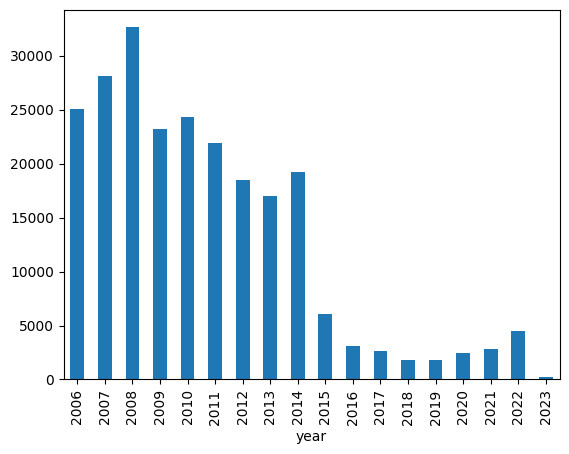

In [41]:
f_ano['Base general'].sum().plot.bar()

<AxesSubplot: xlabel='month'>

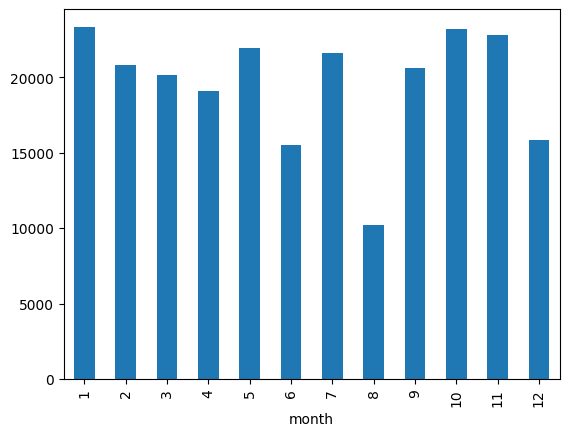

In [44]:
f_mes['Base general'].sum().plot.bar()

In [45]:
df.describe()

,Base general,Beneficio,Total factura,year,month
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,194.031319,23.287568,225.698401,2011.801319,6.351195
std,173.634563,40.513633,199.481754,4.424385,3.490013
min,-371.060000,-145.990000,-421.820000,2006.000000,1.000000
25%,79.430000,0.000000,92.670000,2008.000000,3.000000
50%,155.900000,0.000000,182.570000,2011.000000,6.000000
75%,269.650000,37.870000,317.170000,2014.000000,10.000000
max,1539.250000,361.910000,1733.120000,2023.000000,12.000000
